## 대전광역시 의료서비스 실태조사









### 1. 개요

대전광역시 보건의료 수요와 공급에 대한 기본적인 사항을 산출함

### 2.구별 병.의원 현황

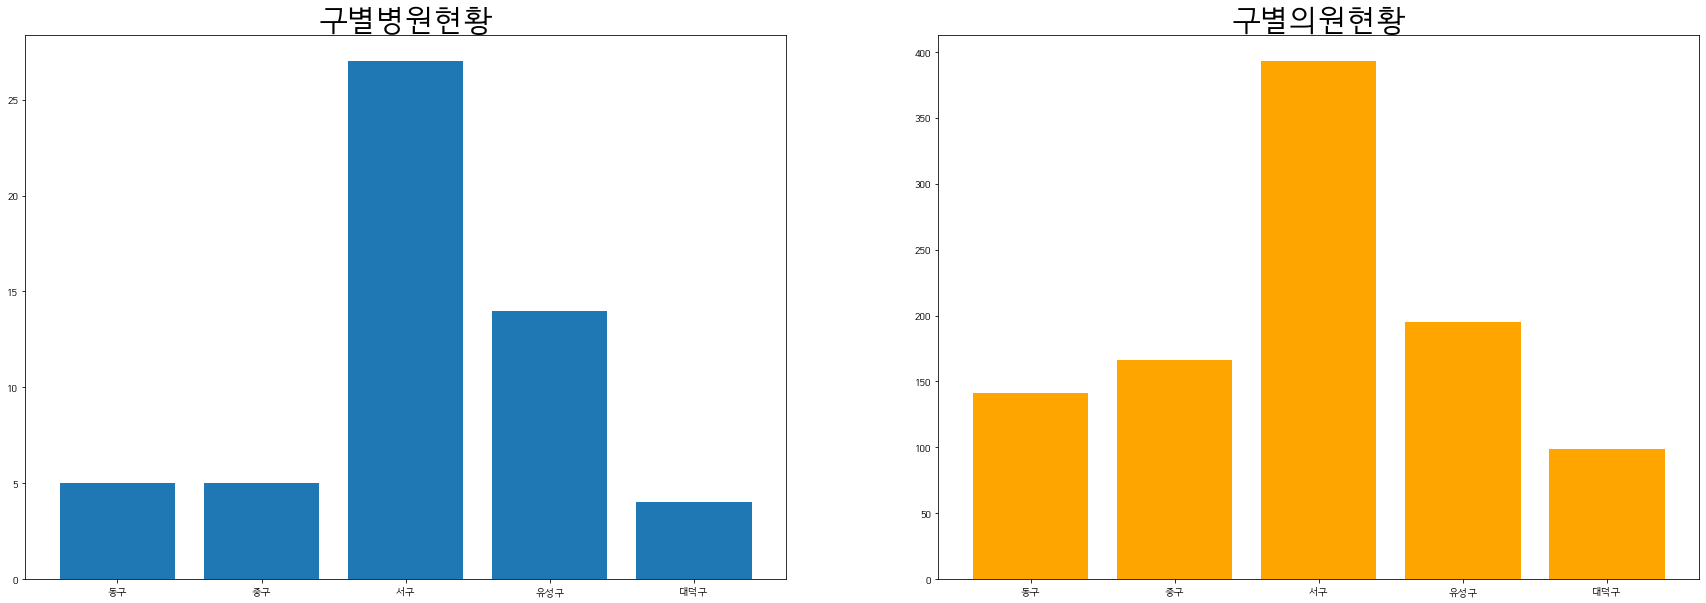

In [33]:
import csv
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium as g
from matplotlib import font_manager, rc

font_path = r'C:\Windows\Fonts\HANDotum.ttf'
font = font_manager.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f=open('병원.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

a=['동구', '중구', '서구', '유성구', '대덕구']
cnt=[]
c=1

for i in range(5):
    for row in data:
        if a[i] in row[2]:
#             print(row[2][:])
            c+=1
    cnt.append(c)
    c=0
    
f=open('의원.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

cnt1=[]
c=1
for i in range(5):
    for row in data:
        if a[i] in row[2]:
            #print(a[i], row[1])
            c+=1
    cnt1.append(c)
    c=0


# plt.figure(figsize=(10,8))
# plt.title('구별병원현황', fontsize=30)
# plt.bar(a, cnt)
# plt.show()
# plt.figure(figsize=(10,8))
# plt.title('구별의원현황', fontsize=30)
# plt.bar(a, cnt1, color='orange')
# plt.show()

f=plt.figure(figsize=(30,10))
ax=f.add_subplot(121)
ax.set_title('구별병원현황', fontsize=30)
ax2=f.add_subplot(122)
ax2.set_title('구별의원현황', fontsize=30)

ax.bar(a, cnt)
ax2.bar(a, cnt1, color='orange')
plt.show()

### 3.구별 인구현황

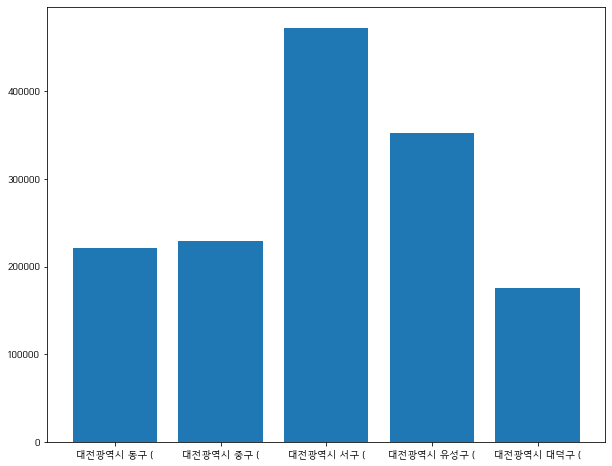

In [129]:
f=open('인구현황.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

title=['대전광역시 동구 (', '대전광역시 중구 (', '대전광역시 서구 (', '대전광역시 유성구 (', '대전광역시 대덕구 (']

value=[]
for i in range(5):
    for row in data:
        if title[i] in row[0]:
            value.append(int(row[1]))
            
plt.figure(figsize=(10,8))
plt.bar(title, value)
#plt.ylim([0,1000000])
plt.show()

### 4.대전시 의료기관 관내외이용 현황

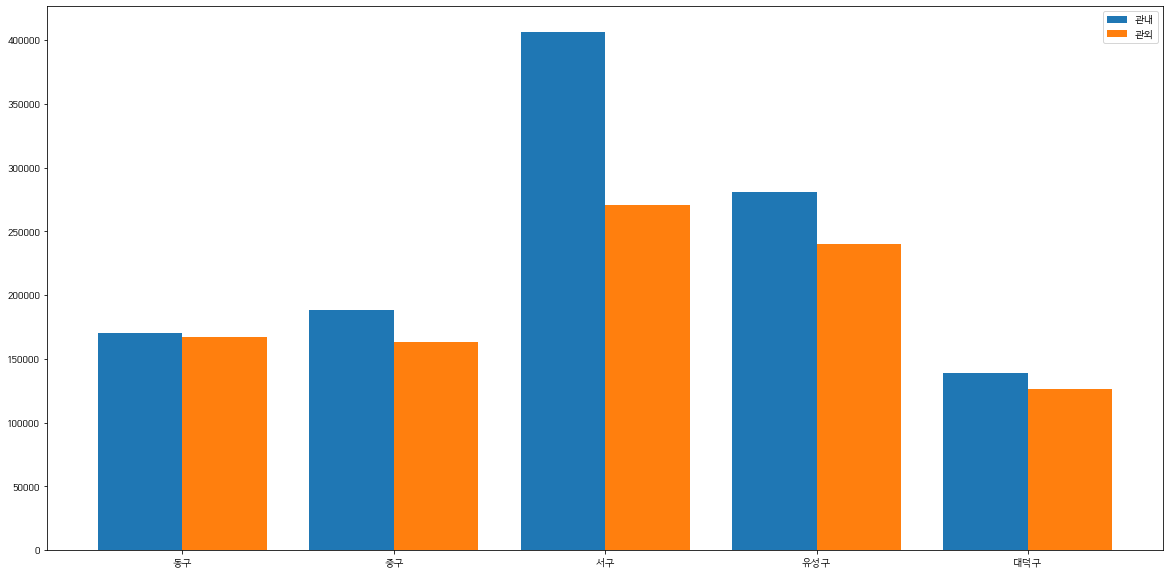

In [32]:
f=open('대전 관내 진료실적.csv', 'r', encoding='cp949')
data=csv.reader(f)
next(data)
header=next(data)
next(data)
data=list(data)

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d) ]

v1=[]
title=[]
for row in data:
    if '대전' in row[0]:
        v1.append(int(row[2]))
        title.append(row[1])
        
f=open('대전 관외 진료실적.csv', 'r', encoding='cp949')
data=csv.reader(f)
next(data)
header=next(data)
next(data)
data=list(data)

v2=[]
for row in data:
    if '대전' in row[0]:
        v2.append(int(row[2]))
        
value_a=create_x(2,0.8,1,5)
value_b=create_x(2,0.8,2,5)

plt.figure(figsize=(20,10))
ax=plt.subplot()
plt.bar(value_a, v1, label='관내')
plt.bar(value_b, v2, label='관외')
middle_x = [(a+b)/2 for (a,b) in zip(value_a, value_b)]
ax.set_xticks(middle_x)
ax.set_xticklabels(title)
plt.legend()
plt.show()

### 5.구별 노인(65세 이상)인구 현황

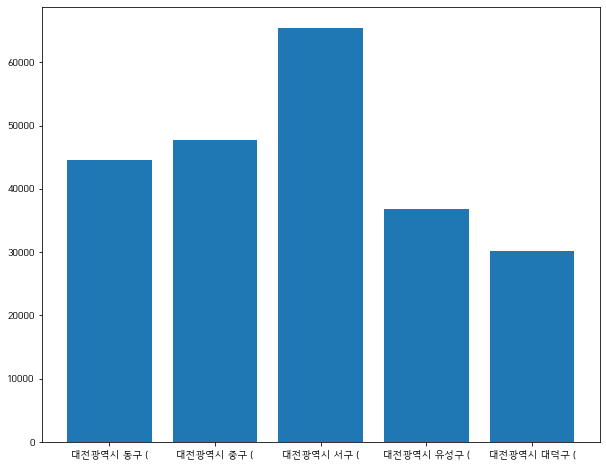

In [84]:
f=open('인구현황.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

title=['대전광역시 동구 (', '대전광역시 중구 (', '대전광역시 서구 (', '대전광역시 유성구 (', '대전광역시 대덕구 (']

value=[]
for i in range(5):
    for row in data:
        if title[i] in row[0]:
            value.append(int(row[68]))
            for j in range(69, 104):
                value[i]+=int(row[j])
                
plt.figure(figsize=(10,8))
plt.bar(title, value)
plt.show()
        

### 6.구별 병의원당 인구 비율

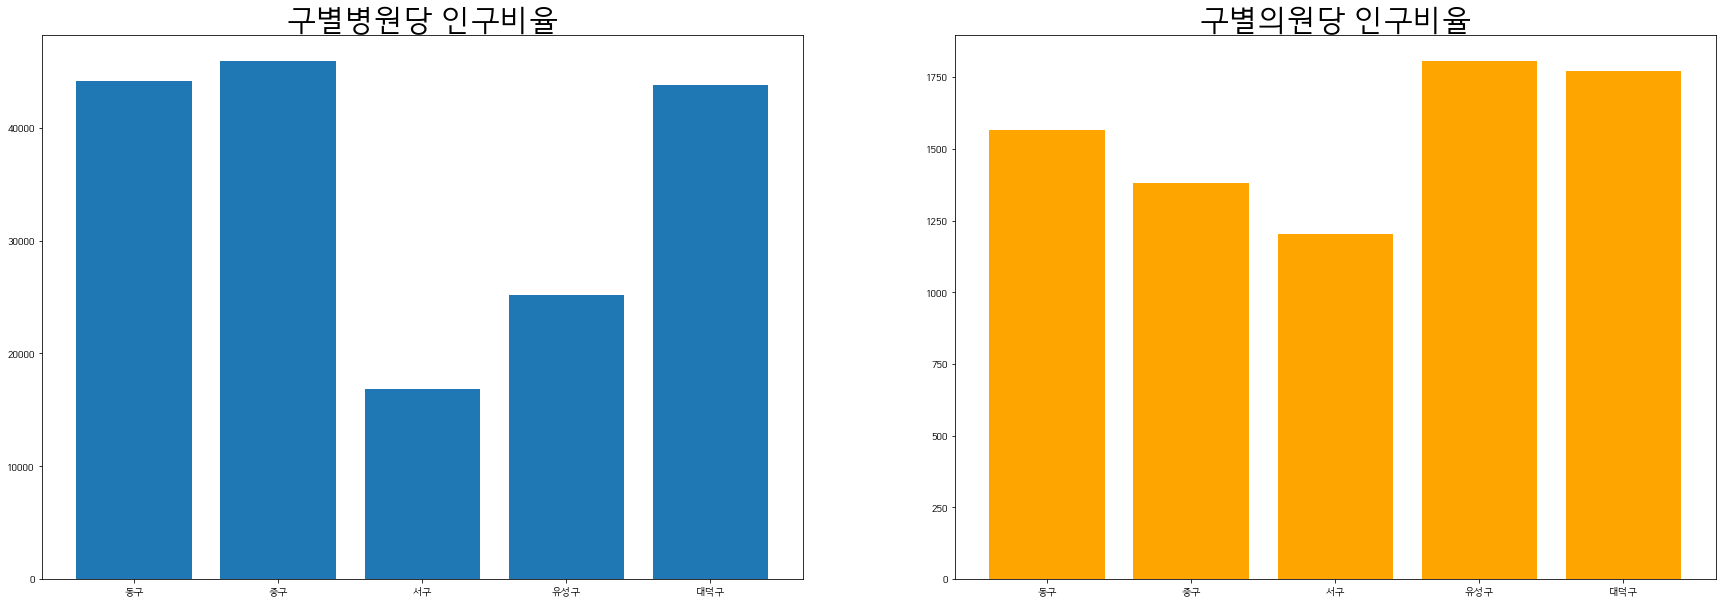

In [131]:
f=open('병원.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

a=['동구', '중구', '서구', '유성구', '대덕구']
cnt=[]
c=1
for i in range(5):
    for row in data:
        if a[i] in row[2]:
            #print(a[i], row[1])
            c+=1
    cnt.append(c)
    c=0
    
f=open('의원.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

cnt1=[]
c=1
for i in range(5):
    for row in data:
        if a[i] in row[2]:
            #print(a[i], row[1])
            c+=1
    cnt1.append(c)
    c=0

f=open('인구현황.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)
f=plt.figure(figsize=(30,10))

title=['대전광역시 동구 (', '대전광역시 중구 (', '대전광역시 서구 (', '대전광역시 유성구 (', '대전광역시 대덕구 (']

value=[]
for i in range(5):
    for row in data:
        if title[i] in row[0]:
            value.append(int(row[1]))
ratio=[]
for i in range(5):
    ratio.append(value[i]/cnt[i])
    
ax=f.add_subplot(121)
ax.set_title('구별병원당 인구비율', fontsize=30)
ax.bar(a, ratio)

ratio=[]
for i in range(5):
    ratio.append(value[i]/cnt1[i])
    
ax2=f.add_subplot(122)
ax2.set_title('구별의원당 인구비율', fontsize=30)
ax2.bar(a, ratio, color='orange')


plt.show()

### 7.대전시 병의원 진료과목 현황

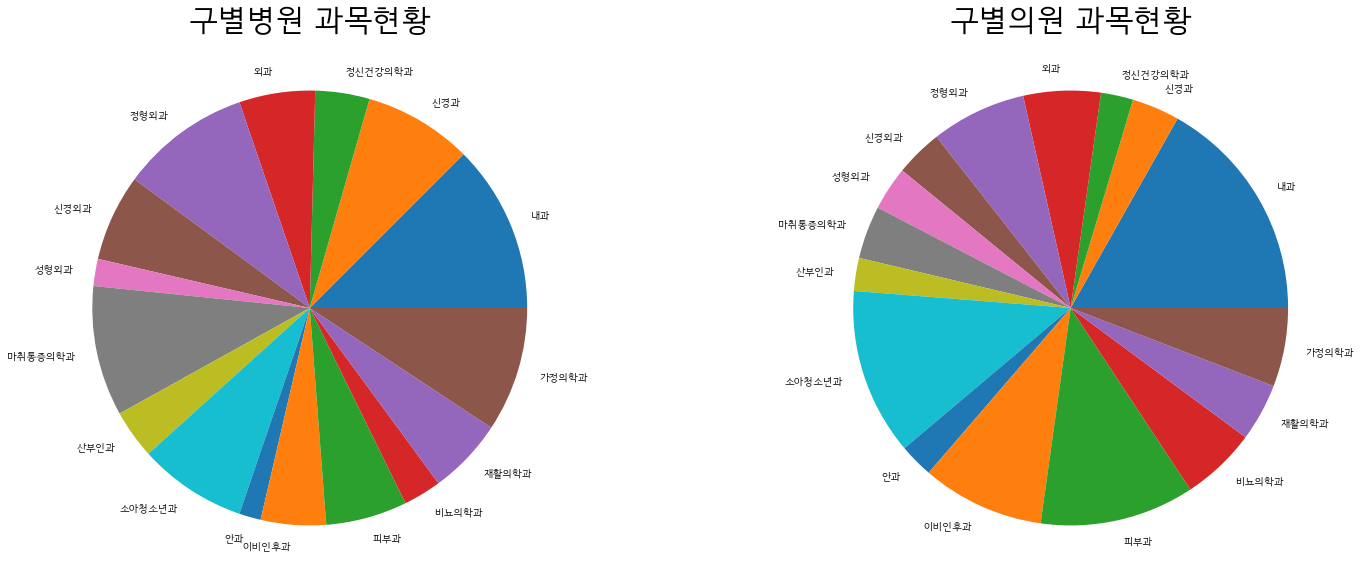

In [19]:
f=open('병원진료과목.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

value=[]

for row in data:
    for i in range(16):
        value.append(int(row[i]))
      
f=plt.figure(figsize=(25,10))
ax=f.add_subplot(121)
ax.set_title('구별병원 과목현황', fontsize=30)
ax2=f.add_subplot(122)
ax2.set_title('구별의원 과목현황', fontsize=30)

ax.pie(value, labels=header)
    
f=open('의원진료과목.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)
data=list(data)

value=[]

for row in data:
    for i in range(16):
        value.append(int(row[i]))
        
ax2.pie(value, labels=header)
plt.show()

### 8.결론

유성구는 서구다음으로 인구가 많지만 의원의수는 적어 병원당인구비율이 높게 나타났다.
중구와 동구의 노인인구에 비해 병의원의 수가 부족 하다.